In [1]:
import matplotlib.pyplot as plt
import tensorflow.keras.losses as losses
import numpy as np


2023-04-24 00:40:04.770765: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-24 00:40:04.899528: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-24 00:40:04.901638: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 00:40:06.366986: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
%run main.py --u

/home/cara/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Shuffling Dataset

Splitting Dataset

Processing training images



100%|██████████| 624/624 [00:10<00:00, 60.49it/s]




Processing validation images



100%|██████████| 78/78 [00:01<00:00, 59.76it/s]




Processing testing images



100%|██████████| 858/858 [00:13<00:00, 61.37it/s]




Training AE model


2023-04-24 00:40:38.526103: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


UPAE


ValueError: Attempt to convert a value (<keras.engine.functional.Functional object at 0x7fbe01058310>) with an unsupported type (<class 'keras.engine.functional.Functional'>) to a Tensor.

In [ ]:
#tensorboard will show trends in precision, recall, etc per epochs
#tensorboard to be opened in a browser using link 
%load_ext tensorboard
%tensorboard --logdir logs/fit

## Testing

In [3]:
#testing using testing set
input_images=image_datasets[2] 
generated = vae.autoencoder.predict(input_images)
generated = np.array(generated)

27/27 [==============================] - 12s 370ms/step


In [4]:
#getting mean reconstruction error score for the images tested
re_score = losses.mean_squared_error(input_images, generated)
re_score = np.mean(re_score)
print("reconstruction error score:", re_score)

reconstruction error score: 758.0596


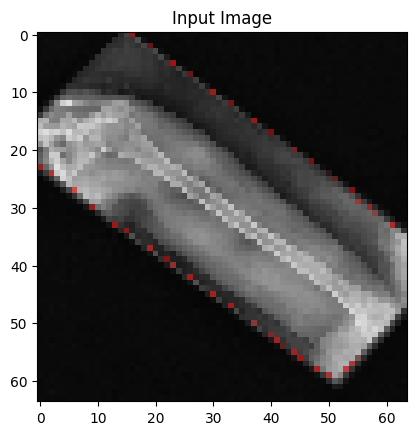

In [6]:
#input image
plt.imshow(image_datasets[2][4])
plt.title("Input Image")
plt.show()

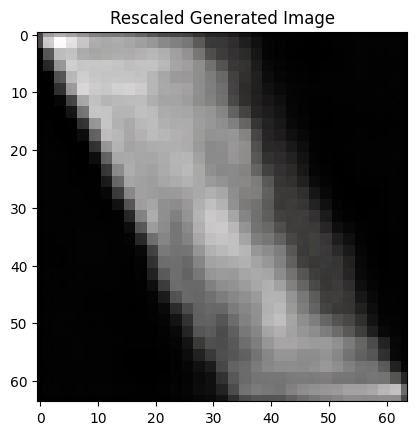

In [7]:
#rescaled generated image
generated_rescaled = (generated[0] - generated[0].min()) / (generated[0].max() - generated[0].min())
plt.imshow(generated_rescaled.reshape(64,64,3))
plt.title("Rescaled Generated Image")
plt.show()

In [9]:
#reconstruction error without Uncertainty Prediciton Score
#for the sample image above
re_score = losses.mean_squared_error(image_datasets[2][0], generated_rescaled )
re_score = np.mean(re_score)
print("Vanilla AE Recon Err", re_score)

Vanilla AE Recon Err 3218.4165


In [ ]:
#reconstruction error with Uncertainty Prediciton Score
